# Módulo 10: Árvores de Regressão

# Exercício 1

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [27]:
# importando bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz

from sklearn.tree import export_graphviz
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split



%matplotlib inline

In [28]:
# carregando arquivo e construindo DataFrame

arquivo = pd.read_csv('boston.csv')
df_boston = pd.DataFrame(arquivo)



In [29]:
# divisão dos dados em y e X

y = df_boston.MEDV
X = df_boston.drop('MEDV',axis=1)


### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [30]:
# informações sobre os dados

df_boston.dtypes


CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [31]:
# correlação entre as variáveis

df_boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


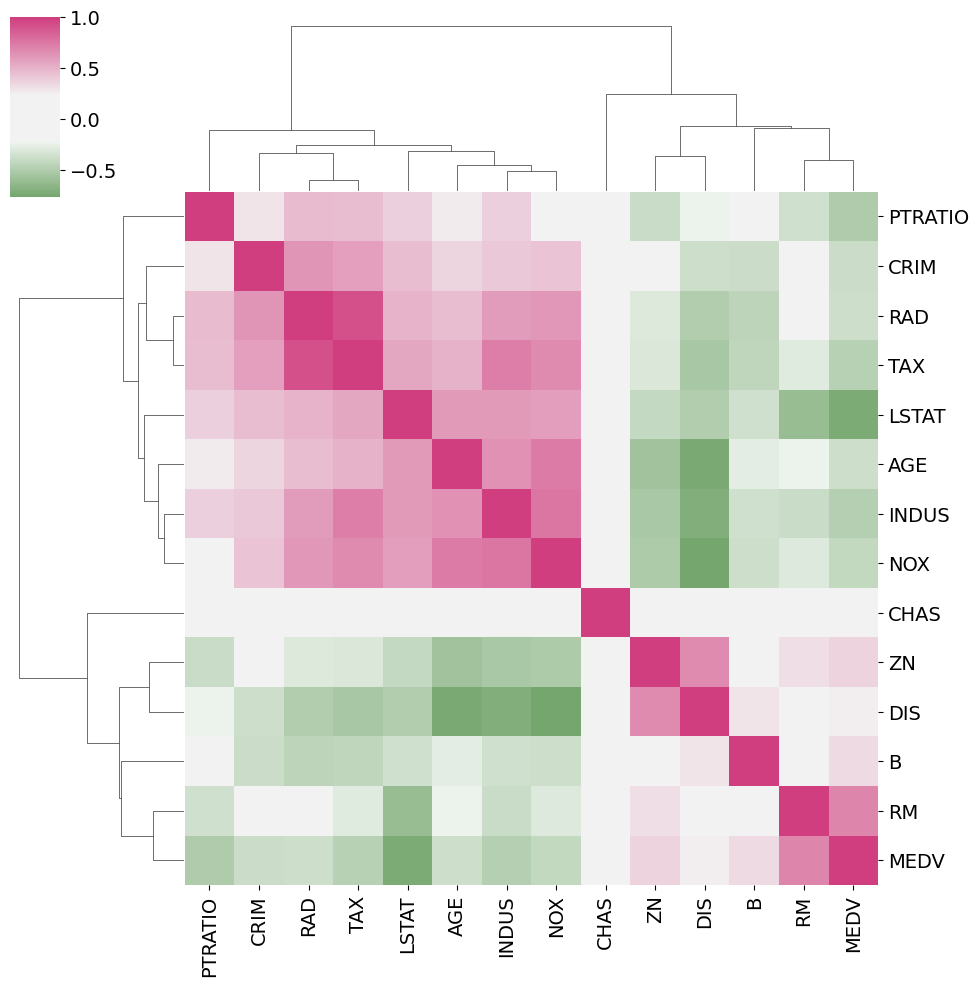

In [32]:
# visualuzação da matriz de correlação de variáveis

cmap = sns.diverging_palette(h_neg=125, h_pos=350, as_cmap=True, sep = 60, center = 'light')
sns.clustermap(df_boston.corr(), figsize=(10, 10), center = 0, cmap=cmap)

**Resposta:** As variáveis com MAIOR potencial preditivo são:
- **RM** (número médio de quartos por habitação) que está diretamente associada á variável resposta **MEDV** (Valor mediano das casas ocupadas pelo proprietário em US $ 1.000); e

- **TAX** (taxa de imposto sobre a propriedade de valor total por $10,000) e **RAD**(índice de acessibilidade a rodovias radiais)

### 3. Separe os dados em validação e teste

In [33]:
# separando os dados em "treino" e "teste"

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [34]:
# TREINANDO as duas árvores de regressão

regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=8)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=8)

In [35]:
# TESTANDO as duas árvores de regressão

regr_3 = DecisionTreeRegressor(max_depth=2)
regr_4 = DecisionTreeRegressor(max_depth=8)

regr_3.fit(X_test, y_test)
regr_4.fit(X_test, y_test)


DecisionTreeRegressor(max_depth=8)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [36]:
# MSE (coeficiente de determinação) para as duas árvore de regressão - TREINO

mse1 = regr_1.score(X_train, y_train)
mse2 = regr_2.score(X_train, y_train)

template = "O R-quadrado da árvore TREINO com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(),mse1).replace(".",","))
print(template.format(regr_2.get_depth(),mse2).replace(".",","))

O R-quadrado da árvore TREINO com profundidade=2 é: 0,73
O R-quadrado da árvore TREINO com profundidade=8 é: 0,98


In [37]:
# MSE (coeficiente de determinação) para as duas árvore de regressão - TESTE

mse3 = regr_3.score(X_test, y_test)
mse4 = regr_4.score(X_test, y_test)

template = "O R-quadrado da árvore TESTE com profundidade={0} é: {1:.2f}"

print(template.format(regr_3.get_depth(),mse1).replace(".",","))
print(template.format(regr_4.get_depth(),mse2).replace(".",","))

O R-quadrado da árvore TESTE com profundidade=2 é: 0,73
O R-quadrado da árvore TESTE com profundidade=8 é: 0,98


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

**Resposta:** O R-quadrado ou coeficiente de determinação é a quantidade de erros explicada pelo modelo. Ele tem o espectro de [0-1] e quanto mais perto de 1 mais ele explica o fenômeno. Portanto a melhor árvore é a de profundidade 8 por ter um MSE maior. Porém, é necessário verificar se há overfitting na árvore. 

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

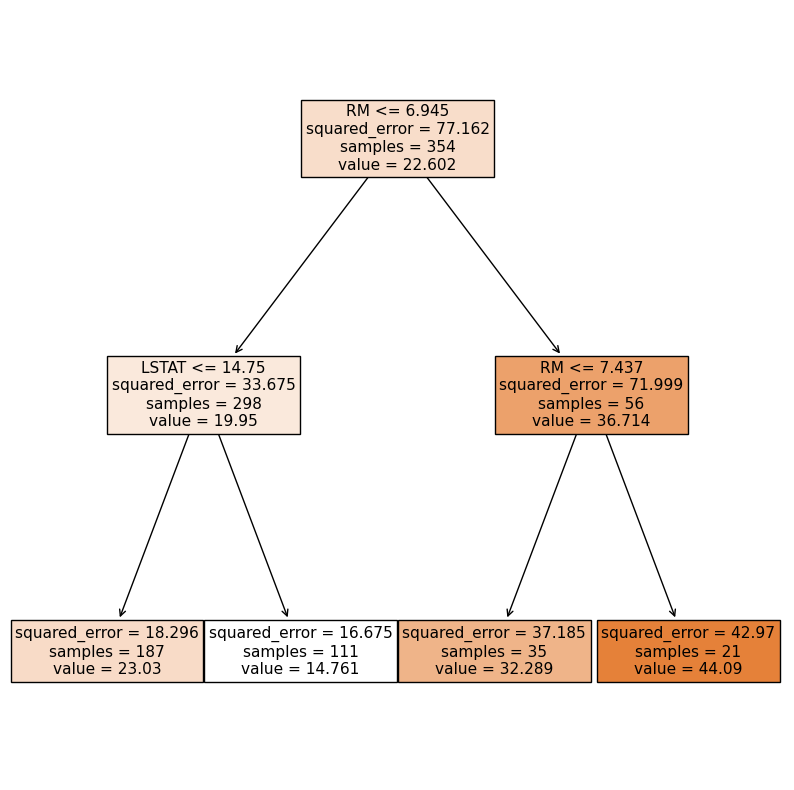

In [38]:
 # visualização dos dados com "PLOT_TREE"

plt.rc('figure', figsize=(10, 10))
tree.plot_tree(regr_1, 
               feature_names=X.columns.tolist(), 
               filled=True)
plt.show()

In [39]:
# visualização dos dados com "EXPORT_TEXT"

representacao_textual = tree.export_text(regr_1)
print(representacao_textual)

|--- feature_5 <= 6.95
|   |--- feature_12 <= 14.75
|   |   |--- value: [23.03]
|   |--- feature_12 >  14.75
|   |   |--- value: [14.76]
|--- feature_5 >  6.95
|   |--- feature_5 <= 7.44
|   |   |--- value: [32.29]
|   |--- feature_5 >  7.44
|   |   |--- value: [44.09]



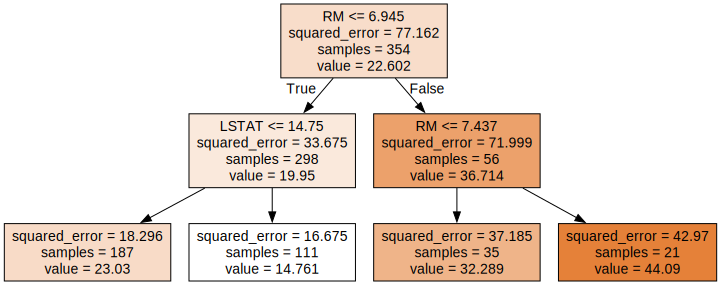

In [40]:
# visualização dos dados com "EXPORT_GRAFHVIZ"
# instalar e colocar nas variáveis de ambiente do Sistema Operacional

dot_data = tree.export_graphviz(regr_1, out_file=None, 
                                feature_names=X.columns,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

**Qual é a variável mais importante?**

**Resposta:** A variável mais importante é a **RM** (número médio de quartos por habitação) que está diretamente associada á variável resposta **MEDV** (Valor mediano das casas ocupadas pelo proprietário em US $ 1.000). A árvore de regressão a elegeu como o maior potencial preditivo na medida que ela é o **nó zero** ou **raíz**.